## Data Preprocessing - Feature selection

In [1]:
#!/bin/bash

#SBATCH -J start-jupyter
#SBATCH -n 4
##SBATCH --exclusive
#SBATCH --gres=gpu:pascal:1
#SBATCH --mem=120G
#SBATCH -t 24:00:00
#SBATCH -p normal_q

echo "starting jupyter notebook"

#PATH=/home/mcclurej/anaconda2/bin:$PATH
export PATH=/opt/apps/anaconda2/4.4.0.1/bin:$PATH

module load cuda
source /opt/DL/caffe-ibm/bin/caffe-activate
source /opt/DL/openblas/bin/openblas-activate
source /opt/DL/tensorflow/bin/tensorflow-activate
source /opt/DL/theano/bin/theano-activate
source /opt/DL/torch/bin/torch-activate
source /opt/DL/digits/bin/digits-activate

#let ipnport=($UID-6025)%65274
#echo $ipnport >> ipnport.txt

#jupyter notebook --ip=$HOSTNAME --port=5034 --no-browser > jupyter.server
unset XDG_RUNTIME_DIR

GPUID=$(echo $CUDA_VISIBLE_DEVICES | cut -c1)
port=`expr 5030 + $GPUID`

jupyter notebook --ip=$HOSTNAME --port=$port --no-browser &>  jupyter.hostname


exit

SyntaxError: invalid syntax (<ipython-input-1-cb0f93066b0a>, line 11)

In [1]:
# Input the data from csv file
import pandas as pd
import numpy as np

df1 = pd.read_csv("worker5_fill_backfill_jan13_feature.csv", sep=',')
df2 = pd.read_csv("worker5_sitting_driving_operating_jan13_feature.csv", sep=',')
df3 = pd.read_csv("worker5_on_off_equipment_jan13_feature.csv", sep=',')
df4 = pd.read_csv("worker5_walking_jan13_feature.csv", sep=',')

# combine the dataframe into one 
df = pd.concat([df1,df2,df3,df4])

In [2]:
# check the data we have
df

,Unnamed: 0,mean_OrientPitch,mean_OrientYaw,mean_OrientRoll,mean_NormAccelX,mean_NormAccelY,mean_NormAccelZ,mean_NormGyroX,mean_NormGyroY,mean_NormGyroZ,...,med_OrientPitch,med_OrientYaw,med_OrientRoll,med_NormAccelX,med_NormAccelY,med_NormAccelZ,med_NormGyroX,med_NormGyroY,med_NormGyroZ,label
0,0,1.112296,-2.500900,-1.438210,-0.055335,0.548150,0.833784,-0.232937,-0.006052,-0.199777,...,1.111805,-2.491260,-1.456045,-0.061060,0.543030,0.837330,-0.235030,-0.022690,-0.239685,fill/backfill
1,1,1.100658,-2.344307,-0.164391,-0.190220,0.593209,0.779534,-0.231657,0.772461,0.267958,...,1.109630,-2.367095,-1.470885,-0.182300,0.592925,0.782720,-0.248990,0.792940,0.237940,fill/backfill
2,2,1.051897,-1.950798,1.964134,-0.093691,0.217313,0.959280,-0.007680,1.118605,0.976890,...,1.052510,-1.930450,1.937770,-0.075055,0.147495,0.985900,-0.041305,1.171665,1.027385,fill/backfill
3,3,1.068316,-1.739513,1.946716,-0.158539,0.051598,0.982754,0.123798,0.602121,0.105880,...,1.052985,-1.757395,1.933865,-0.157070,0.030430,0.982255,0.118100,0.600960,0.191400,fill/backfill
4,4,1.136656,-1.589492,2.042113,-0.277816,0.336429,0.883915,0.179530,0.076560,-0.464360,...,1.137555,-1.590465,2.046690,-0.295525,0.370735,0.879730,0.190235,-0.029085,-0.585830,fill/backfill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,1775,0.810151,1.944157,-0.189401,0.583977,-0.019044,0.695647,0.000463,-0.170456,0.667045,...,0.807040,1.937875,-0.196445,0.629795,-0.040110,0.730085,0.154745,-0.110535,0.468900,walking
1776,1776,0.794026,2.067770,-0.230716,0.733305,-0.064552,0.670049,0.368603,0.130313,0.191631,...,0.792965,2.073975,-0.229400,0.741685,-0.065095,0.665990,0.442720,0.401415,0.042470,walking
1777,1777,0.873531,2.138533,-0.284811,0.625485,-0.022816,0.762940,-0.043399,0.691713,-0.462384,...,0.881645,2.139110,-0.292225,0.618080,-0.035530,0.783165,0.055850,0.660880,-0.349640,walking
1778,1778,0.940887,2.173808,-0.344412,0.576653,-0.015692,0.808581,0.038513,0.089824,-0.090290,...,0.941510,2.176570,-0.342740,0.598010,0.000690,0.800945,0.004075,0.122750,-0.035490,walking


In [3]:
# Write the data into a csv file
df.to_csv('worker5_feature.csv')

In [4]:
# Drop the first column that is not needed
df.drop(columns = ["Unnamed: 0"])

,mean_OrientPitch,mean_OrientYaw,mean_OrientRoll,mean_NormAccelX,mean_NormAccelY,mean_NormAccelZ,mean_NormGyroX,mean_NormGyroY,mean_NormGyroZ,std_OrientPitch,...,med_OrientPitch,med_OrientYaw,med_OrientRoll,med_NormAccelX,med_NormAccelY,med_NormAccelZ,med_NormGyroX,med_NormGyroY,med_NormGyroZ,label
0,1.112296,-2.500900,-1.438210,-0.055335,0.548150,0.833784,-0.232937,-0.006052,-0.199777,0.003373,...,1.111805,-2.491260,-1.456045,-0.061060,0.543030,0.837330,-0.235030,-0.022690,-0.239685,fill/backfill
1,1.100658,-2.344307,-0.164391,-0.190220,0.593209,0.779534,-0.231657,0.772461,0.267958,0.019927,...,1.109630,-2.367095,-1.470885,-0.182300,0.592925,0.782720,-0.248990,0.792940,0.237940,fill/backfill
2,1.051897,-1.950798,1.964134,-0.093691,0.217313,0.959280,-0.007680,1.118605,0.976890,0.011833,...,1.052510,-1.930450,1.937770,-0.075055,0.147495,0.985900,-0.041305,1.171665,1.027385,fill/backfill
3,1.068316,-1.739513,1.946716,-0.158539,0.051598,0.982754,0.123798,0.602121,0.105880,0.034744,...,1.052985,-1.757395,1.933865,-0.157070,0.030430,0.982255,0.118100,0.600960,0.191400,fill/backfill
4,1.136656,-1.589492,2.042113,-0.277816,0.336429,0.883915,0.179530,0.076560,-0.464360,0.006017,...,1.137555,-1.590465,2.046690,-0.295525,0.370735,0.879730,0.190235,-0.029085,-0.585830,fill/backfill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,0.810151,1.944157,-0.189401,0.583977,-0.019044,0.695647,0.000463,-0.170456,0.667045,0.009132,...,0.807040,1.937875,-0.196445,0.629795,-0.040110,0.730085,0.154745,-0.110535,0.468900,walking
1776,0.794026,2.067770,-0.230716,0.733305,-0.064552,0.670049,0.368603,0.130313,0.191631,0.012780,...,0.792965,2.073975,-0.229400,0.741685,-0.065095,0.665990,0.442720,0.401415,0.042470,walking
1777,0.873531,2.138533,-0.284811,0.625485,-0.022816,0.762940,-0.043399,0.691713,-0.462384,0.025940,...,0.881645,2.139110,-0.292225,0.618080,-0.035530,0.783165,0.055850,0.660880,-0.349640,walking
1778,0.940887,2.173808,-0.344412,0.576653,-0.015692,0.808581,0.038513,0.089824,-0.090290,0.006487,...,0.941510,2.176570,-0.342740,0.598010,0.000690,0.800945,0.004075,0.122750,-0.035490,walking


In [5]:
X=df.drop(['label','Unnamed: 0'],axis=1)
y=df['label']
X

,mean_OrientPitch,mean_OrientYaw,mean_OrientRoll,mean_NormAccelX,mean_NormAccelY,mean_NormAccelZ,mean_NormGyroX,mean_NormGyroY,mean_NormGyroZ,std_OrientPitch,...,min_NormGyroZ,med_OrientPitch,med_OrientYaw,med_OrientRoll,med_NormAccelX,med_NormAccelY,med_NormAccelZ,med_NormGyroX,med_NormGyroY,med_NormGyroZ
0,1.112296,-2.500900,-1.438210,-0.055335,0.548150,0.833784,-0.232937,-0.006052,-0.199777,0.003373,...,-0.26877,1.111805,-2.491260,-1.456045,-0.061060,0.543030,0.837330,-0.235030,-0.022690,-0.239685
1,1.100658,-2.344307,-0.164391,-0.190220,0.593209,0.779534,-0.231657,0.772461,0.267958,0.019927,...,0.04305,1.109630,-2.367095,-1.470885,-0.182300,0.592925,0.782720,-0.248990,0.792940,0.237940
2,1.051897,-1.950798,1.964134,-0.093691,0.217313,0.959280,-0.007680,1.118605,0.976890,0.011833,...,0.20943,1.052510,-1.930450,1.937770,-0.075055,0.147495,0.985900,-0.041305,1.171665,1.027385
3,1.068316,-1.739513,1.946716,-0.158539,0.051598,0.982754,0.123798,0.602121,0.105880,0.034744,...,-0.38163,1.052985,-1.757395,1.933865,-0.157070,0.030430,0.982255,0.118100,0.600960,0.191400
4,1.136656,-1.589492,2.042113,-0.277816,0.336429,0.883915,0.179530,0.076560,-0.464360,0.006017,...,-0.77258,1.137555,-1.590465,2.046690,-0.295525,0.370735,0.879730,0.190235,-0.029085,-0.585830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,0.810151,1.944157,-0.189401,0.583977,-0.019044,0.695647,0.000463,-0.170456,0.667045,0.009132,...,-0.57245,0.807040,1.937875,-0.196445,0.629795,-0.040110,0.730085,0.154745,-0.110535,0.468900
1776,0.794026,2.067770,-0.230716,0.733305,-0.064552,0.670049,0.368603,0.130313,0.191631,0.012780,...,-0.54918,0.792965,2.073975,-0.229400,0.741685,-0.065095,0.665990,0.442720,0.401415,0.042470
1777,0.873531,2.138533,-0.284811,0.625485,-0.022816,0.762940,-0.043399,0.691713,-0.462384,0.025940,...,-0.87962,0.881645,2.139110,-0.292225,0.618080,-0.035530,0.783165,0.055850,0.660880,-0.349640
1778,0.940887,2.173808,-0.344412,0.576653,-0.015692,0.808581,0.038513,0.089824,-0.090290,0.006487,...,-0.56780,0.941510,2.176570,-0.342740,0.598010,0.000690,0.800945,0.004075,0.122750,-0.035490


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
X_train.head()

,mean_OrientPitch,mean_OrientYaw,mean_OrientRoll,mean_NormAccelX,mean_NormAccelY,mean_NormAccelZ,mean_NormGyroX,mean_NormGyroY,mean_NormGyroZ,std_OrientPitch,...,min_NormGyroZ,med_OrientPitch,med_OrientYaw,med_OrientRoll,med_NormAccelX,med_NormAccelY,med_NormAccelZ,med_NormGyroX,med_NormGyroY,med_NormGyroZ
489,0.246177,-1.535023,2.417621,-0.761502,0.589671,0.268868,0.077258,0.163706,0.008029,0.004072,...,-0.05818,0.244520,-1.535895,2.416995,-0.761350,0.590560,0.271025,0.083190,0.162310,0.013965
6472,-0.617297,-1.203439,0.974654,0.370233,0.739391,-0.561311,0.264002,0.413282,-0.545225,0.002802,...,-0.87031,-0.617130,-1.202660,0.975965,0.365115,0.740115,-0.564825,0.274590,0.385710,-0.526490
2626,0.626523,-0.848443,2.955217,-0.723206,0.397118,0.565025,0.011403,0.018850,0.044795,0.001238,...,-0.00582,0.626500,-0.848325,2.955255,-0.723850,0.396825,0.564340,0.011055,0.023270,0.054685
1607,0.429729,-1.551963,1.960353,-0.389467,0.793214,0.456756,-0.021411,-0.347311,-1.064269,0.008852,...,-1.30779,0.431250,-1.553980,1.953115,-0.417595,0.790340,0.470500,-0.036070,-0.364760,-1.176900
6373,-0.568046,-1.689646,0.804279,0.569547,0.625617,-0.533087,-0.112512,-0.068065,0.032928,0.002236,...,0.01978,-0.567675,-1.689280,0.804140,0.570620,0.625340,-0.532695,-0.113440,-0.065155,0.034325


#### Feacture score - feature selection

In [8]:
from sklearn.feature_selection import SelectPercentile
import numpy as np
select = SelectPercentile(percentile=70)
select.fit(X_train, y_train)
# transform training set:
X_train_selected = select.transform(X_train)
print('Feature scores：',select.scores_)
print('Dimensions before filtering：',X_train.shape)
print('Dimensions after filtering：',X_train_selected.shape)
np.argsort(select.scores_) #select features based on score


Feature scores： [8.36720914e+01 3.04231727e+02 2.71347033e+02 1.43794224e+02
 8.19047834e+02 5.96781159e+01 1.34167037e+00 5.28085543e-01
 8.77672878e-01 2.36328738e+02 4.71731913e+01 9.62289662e+01
 2.37806706e+02 3.78831442e+02 1.94292395e+02 1.56440100e+02
 1.03602307e+02 8.53270470e+01 6.18542371e+01 1.56434376e+01
 5.86711174e+01 1.59384337e+02 2.08781001e+02 1.01898686e+02
 1.52588750e+01 1.37343625e+01 7.93411408e+00 9.53601949e+01
 3.27452426e+02 1.95800187e+02 6.39607300e+01 5.39428110e+02
 8.93301187e+01 7.69075871e+01 4.62056230e+01 5.17805995e+01
 7.32740549e+01 2.41429796e+02 3.19930219e+02 2.54932812e+02
 9.49567618e+02 3.04198811e+01 5.64869599e+01 7.68080520e+01
 5.17161888e+01 8.33562233e+01 2.95568446e+02 2.59758343e+02
 1.48212388e+02 7.99788836e+02 6.46382637e+01 1.24549169e+00
 5.06920323e-01 1.45362064e+00]
Dimensions before filtering： (17466, 54)
Dimensions after filtering： (17466, 38)


array([52,  7,  8, 51,  6, 53, 26, 25, 24, 19, 41, 34, 10, 44, 35, 42, 20,
        5, 18, 30, 50, 36, 43, 33, 45,  0, 17, 32, 27, 11, 23, 16,  3, 48,
       15, 21, 14, 29, 22,  9, 12, 37, 39, 47,  2, 46,  1, 38, 28, 13, 31,
       49,  4, 40], dtype=int64)

In [16]:
# We may want to select the first 10 features, and first 6 features (corresponding to pca process)
# Select the first 10 features
X_train_filtered = X_train.iloc[:,list(np.sort([2, 46,  1, 38, 28, 13, 31, 49,  4, 40]))]

X_test_filtered = X_test.iloc[:,list(np.sort([2, 46,  1, 38, 28, 13, 31, 49,  4, 40]))]

#### PCA - Principal component analysis - Feature selection

In [10]:
from sklearn.preprocessing import StandardScaler

# Standarding the features
X_train_std = StandardScaler().fit_transform(X_train)

from sklearn.decomposition import PCA

# Select the 10 most important components
pca = PCA(n_components=10)

# Fit PCA transformation to the X training set data
principalComponents = pca.fit_transform(X_train_std)

# Print out the 10 principal components of the data
principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['principal 1','principal 2','principal 3',
                                    'principal 4','principal 5','principal 6',
                                    'principal 7','principal 8','principal 9',
                                    'principal 10'])
principalDf

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6,principal 7,principal 8,principal 9,principal 10
0,-2.556967,0.773529,1.066962,1.590714,-0.108964,-0.357501,0.008463,0.547818,0.368249,0.108886
1,-2.336178,5.397944,-4.422441,-1.249329,0.191059,-1.214085,-0.095622,0.196267,0.069362,2.150616
2,-1.547929,-1.566331,1.508071,2.297962,0.200914,-0.082765,-0.532493,-0.361360,0.058520,0.040331
3,-1.198147,0.911296,1.006628,-1.152400,2.569641,0.331663,0.427018,-0.695435,-0.527893,1.421518
4,-2.614396,4.612576,-4.874918,-2.212756,-0.380894,0.415592,-0.674709,0.843631,0.339475,0.252345
...,...,...,...,...,...,...,...,...,...,...
17461,-2.194748,-0.312631,1.378209,1.872067,0.293816,0.013459,-0.263270,0.607911,0.410523,-0.067331
17462,3.359387,-4.896278,-2.763165,-0.117254,1.712027,-0.144109,-0.396502,0.340043,-0.383557,1.319124
17463,12.849397,-1.039556,-0.062694,5.826625,-8.850593,-0.917579,9.631933,-0.824255,-1.501969,-0.921232
17464,-2.532599,0.408196,1.132603,1.274092,0.191265,-0.013263,-0.026087,0.339583,0.258976,-0.042935


In [11]:
# Let's check how the principal components perform in the datasets
pca.explained_variance_ratio_

# Now we may only need the first 6 principal component since start from the 7th, all below 4%
# account for the variance.

# If we use 10 components: account for 83.7% variance
# If we use 6 components: account for 70% variance

array([0.23255417, 0.16997535, 0.09539205, 0.08156499, 0.06642681,
       0.05665971, 0.03834081, 0.03522416, 0.03422932, 0.03340884])

In [12]:
# Add the principal component data with the label, combine them as the table for classification
finaldf= pd.concat([principalDf,pd.DataFrame(y_train).reset_index().drop(columns=['index'])],axis=1)
finaldf

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6,principal 7,principal 8,principal 9,principal 10,label
0,-2.556967,0.773529,1.066962,1.590714,-0.108964,-0.357501,0.008463,0.547818,0.368249,0.108886,fill/backfill
1,-2.336178,5.397944,-4.422441,-1.249329,0.191059,-1.214085,-0.095622,0.196267,0.069362,2.150616,fill/backfill
2,-1.547929,-1.566331,1.508071,2.297962,0.200914,-0.082765,-0.532493,-0.361360,0.058520,0.040331,on/off equipment
3,-1.198147,0.911296,1.006628,-1.152400,2.569641,0.331663,0.427018,-0.695435,-0.527893,1.421518,fill/backfill
4,-2.614396,4.612576,-4.874918,-2.212756,-0.380894,0.415592,-0.674709,0.843631,0.339475,0.252345,on/off equipment
...,...,...,...,...,...,...,...,...,...,...,...
17461,-2.194748,-0.312631,1.378209,1.872067,0.293816,0.013459,-0.263270,0.607911,0.410523,-0.067331,sitting/driving/operating
17462,3.359387,-4.896278,-2.763165,-0.117254,1.712027,-0.144109,-0.396502,0.340043,-0.383557,1.319124,on/off equipment
17463,12.849397,-1.039556,-0.062694,5.826625,-8.850593,-0.917579,9.631933,-0.824255,-1.501969,-0.921232,sitting/driving/operating
17464,-2.532599,0.408196,1.132603,1.274092,0.191265,-0.013263,-0.026087,0.339583,0.258976,-0.042935,sitting/driving/operating


In [13]:
# Then we will collect it as after pca for training purpose
X_train_pca = finaldf.drop(columns=['label'])

X_train_pca

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6,principal 7,principal 8,principal 9,principal 10
0,-2.556967,0.773529,1.066962,1.590714,-0.108964,-0.357501,0.008463,0.547818,0.368249,0.108886
1,-2.336178,5.397944,-4.422441,-1.249329,0.191059,-1.214085,-0.095622,0.196267,0.069362,2.150616
2,-1.547929,-1.566331,1.508071,2.297962,0.200914,-0.082765,-0.532493,-0.361360,0.058520,0.040331
3,-1.198147,0.911296,1.006628,-1.152400,2.569641,0.331663,0.427018,-0.695435,-0.527893,1.421518
4,-2.614396,4.612576,-4.874918,-2.212756,-0.380894,0.415592,-0.674709,0.843631,0.339475,0.252345
...,...,...,...,...,...,...,...,...,...,...
17461,-2.194748,-0.312631,1.378209,1.872067,0.293816,0.013459,-0.263270,0.607911,0.410523,-0.067331
17462,3.359387,-4.896278,-2.763165,-0.117254,1.712027,-0.144109,-0.396502,0.340043,-0.383557,1.319124
17463,12.849397,-1.039556,-0.062694,5.826625,-8.850593,-0.917579,9.631933,-0.824255,-1.501969,-0.921232
17464,-2.532599,0.408196,1.132603,1.274092,0.191265,-0.013263,-0.026087,0.339583,0.258976,-0.042935


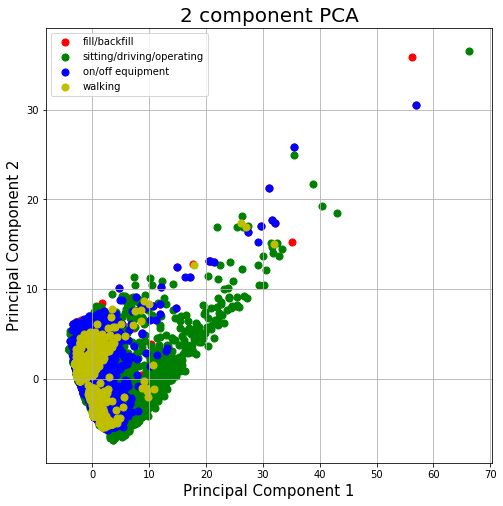

In [21]:
# We can also use plot to see their disparse level between groups after pca process
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['fill/backfill', 'sitting/driving/operating', 'on/off equipment','walking']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['label'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'principal 1']
               , finaldf.loc[indicesToKeep, 'principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


#### Try to compare the effect of two feature selection method, considering worker 5 motion

In [14]:
import warnings
warnings.filterwarnings('ignore')

#### Using feature score method to select the features, and we calculate the execution time for each method

#### Linear Regression Method - Feature score method

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import time

# Select the first 10 features for X_test
X_test_filtered = X_test.iloc[:,list(np.sort([2, 46,  1, 38, 28, 13, 31, 49,  4, 40]))]

# starting time
start = time.time()

clf = GridSearchCV(
    estimator = LogisticRegression (),
    param_grid = {'penalty': ['l1','l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    cv=StratifiedKFold(n_splits=3).split(X_train_filtered, y_train)
)

clf.fit(X_train_filtered,y_train) # Fit the model through filtered data

print(clf.best_params_)
y_pred = clf.predict(X_test_filtered) # Predict the result of the classification

# end time
end = time.time()

print(classification_report(y_test, y_pred))

# total time taken
print(f"Runtime of the program is {end - start}")

{'C': 100, 'penalty': 'l1'}
                           precision    recall  f1-score   support

            fill/backfill       0.20      0.02      0.03      1822
         on/off equipment       0.35      0.71      0.47      1771
sitting/driving/operating       0.46      0.55      0.50      1779
                  walking       0.00      0.00      0.00       451

                 accuracy                           0.39      5823
                macro avg       0.26      0.32      0.25      5823
             weighted avg       0.31      0.39      0.31      5823

Runtime of the program is 100.89145851135254


#### Using pca method to select the features

In [28]:
# Standarding the features
X_test_std = StandardScaler().fit_transform(X_test)

# Fit PCA transformation to the X training set data
principalComponents_test = pca.fit_transform(X_test_std)

# Print out the 10 principal components of the data
X_test_pca = pd.DataFrame(data = principalComponents_test,
                          columns = ['principal 1','principal 2','principal 3',
                                    'principal 4','principal 5','principal 6',
                                    'principal 7','principal 8','principal 9',
                                    'principal 10'])

# starting time
start = time.time()

clf = GridSearchCV(
    estimator = LogisticRegression (),
    param_grid = {'penalty': ['l1','l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    cv=StratifiedKFold(n_splits=3).split(X_train_pca, y_train)
)

clf.fit(X_train_pca,y_train)

print(clf.best_params_)
y_pred = clf.predict(X_test_pca)

# end time
end = time.time()

print(classification_report(y_test, y_pred))

# total time taken
print(f"Runtime of the program is {end - start}")

{'C': 0.1, 'penalty': 'l1'}
                           precision    recall  f1-score   support

            fill/backfill       0.22      0.03      0.06      1822
         on/off equipment       0.35      0.74      0.47      1771
sitting/driving/operating       0.50      0.51      0.51      1779
                  walking       0.00      0.00      0.00       451

                 accuracy                           0.39      5823
                macro avg       0.27      0.32      0.26      5823
             weighted avg       0.33      0.39      0.32      5823

Runtime of the program is 9.860646963119507


#### Compare to the original method

In [29]:
# starting time
start = time.time()

clf = GridSearchCV(
    estimator = LogisticRegression (),
    param_grid = {'penalty': ['l1','l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    cv=StratifiedKFold(n_splits=3).split(X_train, y_train)
)

clf.fit(X_train,y_train)

print(clf.best_params_)
y_pred = clf.predict(X_test)

# end time
end = time.time()

print(classification_report(y_test, y_pred))

# total time taken
print(f"Runtime of the program is {end - start}")

{'C': 0.1, 'penalty': 'l1'}
                           precision    recall  f1-score   support

            fill/backfill       0.37      0.21      0.27      1822
         on/off equipment       0.37      0.56      0.44      1771
sitting/driving/operating       0.56      0.66      0.61      1779
                  walking       0.00      0.00      0.00       451

                 accuracy                           0.44      5823
                macro avg       0.33      0.36      0.33      5823
             weighted avg       0.40      0.44      0.41      5823

Runtime of the program is 944.9907817840576


#### Use KNN method to re-test the data 

##### Using feature score to select the features

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import time

# starting time
start = time.time()

k_range = list(range(1,30))
weight_options = ["uniform", "distance"]

clf = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = dict(n_neighbors = k_range, weights = weight_options),
    cv=StratifiedKFold(n_splits=3).split(X_train_filtered, y_train)
)

clf.fit(X_train_filtered,y_train) # Fit the model through filtered data


print(clf.best_params_)
y_pred = clf.predict(X_test_filtered)
# end time
end = time.time()

print(classification_report(y_test, y_pred))


# total time taken
print(f"Runtime of the program is {end - start}")

{'n_neighbors': 26, 'weights': 'uniform'}
                           precision    recall  f1-score   support

            fill/backfill       0.36      0.40      0.38      1822
         on/off equipment       0.31      0.25      0.28      1771
sitting/driving/operating       0.71      0.79      0.75      1779
                  walking       0.71      0.60      0.65       451

                 accuracy                           0.49      5823
                macro avg       0.52      0.51      0.51      5823
             weighted avg       0.48      0.49      0.48      5823

Runtime of the program is 62.7965292930603


#### Compare to original method with all the features

In [18]:
# starting time
start = time.time()

k_range = list(range(1,30))
weight_options = ["uniform", "distance"]

clf = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = dict(n_neighbors = k_range, weights = weight_options),
    cv=StratifiedKFold(n_splits=3).split(X_train, y_train)
)

clf.fit(X_train,y_train)

print(clf.best_params_)
y_pred = clf.predict(X_test)

# end time
end = time.time()

print(classification_report(y_test, y_pred))

{'n_neighbors': 28, 'weights': 'uniform'}
                           precision    recall  f1-score   support

            fill/backfill       0.37      0.42      0.39      1822
         on/off equipment       0.30      0.24      0.27      1771
sitting/driving/operating       0.74      0.81      0.77      1779
                  walking       0.79      0.62      0.69       451

                 accuracy                           0.50      5823
                macro avg       0.55      0.52      0.53      5823
             weighted avg       0.49      0.50      0.49      5823



In [19]:
# total time taken
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1111.6270413398743


##### Using PCA to select the features

In [20]:
# Standarding the features
X_test_std = StandardScaler().fit_transform(X_test)

# Fit PCA transformation to the X training set data
principalComponents_test = pca.fit_transform(X_test_std)

# Print out the 10 principal components of the data
X_test_pca = pd.DataFrame(data = principalComponents_test,
                          columns = ['principal 1','principal 2','principal 3',
                                    'principal 4','principal 5','principal 6',
                                    'principal 7','principal 8','principal 9',
                                    'principal 10'])

# starting time
start = time.time()

k_range = list(range(1,30))
weight_options = ["uniform", "distance"]

clf = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = dict(n_neighbors = k_range, weights = weight_options),
    cv=StratifiedKFold(n_splits=3).split(X_train_pca, y_train)
)

clf.fit(X_train_pca,y_train)

print(clf.best_params_)
y_pred = clf.predict(X_test_pca)

# end time
end = time.time()

print(classification_report(y_test, y_pred))

# total time taken
print(f"Runtime of the program is {end - start}")

{'n_neighbors': 18, 'weights': 'uniform'}
                           precision    recall  f1-score   support

            fill/backfill       0.38      0.39      0.38      1822
         on/off equipment       0.37      0.26      0.30      1771
sitting/driving/operating       0.51      0.65      0.57      1779
                  walking       0.31      0.28      0.29       451

                 accuracy                           0.42      5823
                macro avg       0.39      0.39      0.39      5823
             weighted avg       0.41      0.42      0.41      5823

Runtime of the program is 155.8889923095703
